In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from matplotlib.textpath import TextPath
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram

In [2]:
df = pd.read_csv('../dataset/complete_dataset.csv')
#dfs is the original dataframe without slicing, since df would be used as a sliced dataframe later on 
dfs = df.sample(frac=1)
dfs.shape


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,1,3,5,6,7,8,9,16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(10927181, 19)

## Visualisation of the Dataframe

### **Original Dataframe**

In [3]:
print(dfs.shape)
dfs.head()

(10927181, 19)


,filename,text,IMDB_ID,genre,year,production_region,corpus,duration,directors,writers,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes
3860811,NaN,NaN,tt1356905,NaN,NaN,NaN,NaN,NaN,NaN,NaN,video,Famiresu tenshi purin,Famiresu tenshi purin,1.0,2008.0,NaN,NaN,NaN,NaN
10769730,NaN,NaN,tt9787684,NaN,NaN,NaN,NaN,NaN,nm1076912,"nm6308414,nm8152782,nm5035583,nm8152783,nm8152...",tvEpisode,Episode #18.36,Episode #18.36,0.0,2014.0,NaN,NaN,NaN,NaN
5580338,NaN,NaN,tt2617406,NaN,NaN,NaN,NaN,NaN,nm5445230,nm5445230,tvEpisode,Naranjas y batamanta,Naranjas y batamanta,0.0,2012.0,NaN,NaN,NaN,NaN
8633085,NaN,NaN,tt6895604,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tvEpisode,Episode #1.1560,Episode #1.1560,0.0,NaN,NaN,NaN,NaN,NaN
3100194,NaN,NaN,tt11645604,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tvEpisode,The Naked Witch,The Naked Witch,0.0,2019.0,NaN,NaN,NaN,NaN


### **Dataframe without NaN in text, genre, year and production_region**

In [4]:
df.dropna(subset=['text', 'genre', 'year', 'production_region'], inplace=True)
df.drop_duplicates(subset=['IMDB_ID'], inplace=True)
print(df.shape)
df.head()

(11557, 19)


,filename,text,IMDB_ID,genre,year,production_region,corpus,duration,directors,writers,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes
109,3653850.xml,[ Subtitles by Subturtles ] Du sollst nach Hau...,tt1175,"Drama,Romance",1912.0,French,untokenisiert,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,6581015.xml,HINTER DER LEIWAND Die Anwendung für die Arbei...,tt6414,"Comedy,Romance,Short",1916.0,English,untokenisiert,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,6564964.xml,DER GRAF Maße : Hals 30 cm - Ohr - 4 cm Mounth...,tt6548,"Comedy,Short",1916.0,English,untokenisiert,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,6412883.xml,"Chaplin bei der Feuerwehr "" Lass doch das Haus...",tt6684,"Comedy,Short",1916.0,English,untokenisiert,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,6565009.xml,Der Abenteurer Der Mann Jagd . Ein morgendlich...,tt7613,"Comedy,Short",1917.0,English,untokenisiert,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Plot Production 

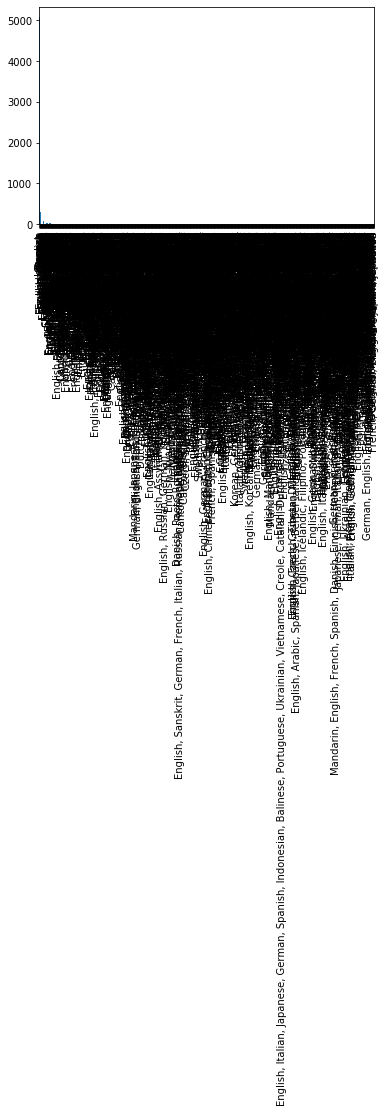

In [5]:
pd.value_counts(df['production_region']).plot.bar()

# Plot Main Country (the first country mentioned on each rows)

In [31]:
df['main_country'] = df.production_region.str.split(',')
main = df['main_country']
main_country = main.apply(lambda x: x[0])
df['main_country'] = main_country
df[df['production_region'].str.contains(" Sign Language")]


,filename,text,IMDB_ID,genre,year,production_region,corpus,duration,directors,writers,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes,main_country
1799,6885369.xml,"Ich bin William Castle , der Regisseur des Fil...",tt53363,Horror,1959.0,"English, American Sign Language",untokenisiert,82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English
4022,191434.xml,Dies ist eine wahre Geschichte . Sie beginnt i...,tt64285,Drama,1970.0,"French, French Sign Language",untokenisiert,83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,French
5340,6423651.xml,"FRANKENSTEINS TODESRENNEN Oh , amerikanische M...",tt72856,"Action,Comedy,Sci-Fi",1975.0,"English, Brazilian Sign Language, Spanish",untokenisiert,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English
8737,167758.xml,So einen erstaunlichen Lebenslauf sah ich noch...,tt90830,"Drama,Romance",1986.0,"English, American Sign Language",untokenisiert,119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English
9293,236195.xml,1853 reiste eine Gruppe Amerikaner nach Sonora...,tt96409,"Biography,Drama,History",1987.0,"English, American Sign Language",untokenisiert,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English
9545,6297629.xml,Komm schon ! Schneller ! Fahr rechts ran ! Fah...,tt94889,"Comedy,Drama,Romance",1988.0,"English, Spanish Sign Language",untokenisiert,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English
11914,4794235.xml,VIER HOCHZEITEN UND EIN TODESFALL - Hey . - Wa...,tt109831,"Comedy,Drama,Romance",1994.0,"English, British Sign Language",untokenisiert,117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English
11967,191540.xml,Das Wunder von Manhattan COLE ' S LEBT ! Kaufh...,tt110527,"Family,Fantasy",1994.0,"English, American Sign Language",untokenisiert,114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English
12008,6190021.xml,"AM WILDEN FLUSS Roarke ! Zum tausendsten Mal ,...",tt110997,"Action,Adventure,Crime",1994.0,"English, American Sign Language",untokenisiert,111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English
13060,5865076.xml,Komm schon ! Toll ! Super ! Hast du dir wehget...,tt116692,"Drama,Music",1996.0,"German, German Sign Language, English, Spanish",untokenisiert,109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,German


In [32]:
df.main_country

109       French
110      English
111      English
113      English
116      English
          ...   
59644    English
59646    English
59654    English
59664    English
59666    English
Name: main_country, Length: 11557, dtype: object

In [33]:
df.main_country.unique()
print(df.main_country.unique())
len(df.main_country.unique())

['French' 'English' 'Swedish' 'German' 'Slovak' 'Russian' 'Polish'
 'Spanish' 'Portuguese' 'Czech' 'Danish' 'Croatian' 'Italian' 'Japanese'
 'Swiss German' 'Romanian' 'Georgian' 'Dutch' 'Turkish' 'Bulgarian'
 'Ukrainian' 'Mandarin' 'Urdu' 'Estonian' 'Hebrew' 'Serbo-Croatian'
 'Greek' 'Norwegian' 'Korean' 'Cantonese' 'Finnish' 'Arabic' 'Icelandic'
 'Serbian' 'Belarusian' 'Saami' 'Scanian' 'Bambara' 'Azerbaijani'
 'Hungarian' 'Afrikaans' 'Faroese' 'Lithuanian' 'Hindi' 'More'
 'Vietnamese' 'Bosnian' 'Persian' 'Romany' 'Khmer' 'Tamil' 'Tibetan'
 'Catalan' 'Kurdish' 'Thai' 'Wolof' 'Aboriginal' 'Slovenian' 'Dari'
 'Aramaic' 'Panjabi' 'Kazakh' 'Mongolian' 'Zulu' 'Maya' 'Hokkien'
 'Flemish' 'Filipino' 'Kirghiz' 'Irish' 'Inupiaq' 'Min Nan' 'Neapolitan'
 'Indonesian' 'Chinese' 'Greenlandic' 'Ladakhi' 'Albanian' 'Malay'
 'Inuktitut' 'Maori' 'Telugu']


82

In [34]:
from collections import Counter
main_country_frequs = Counter(df.main_country)
print('There are', len(main_country_frequs), 'main Countries where the Movies are produced')
main_country_frequs.most_common(20)

There are 82 main Countries where the Movies are produced


[('English', 6862),
 ('French', 1109),
 ('German', 981),
 ('Japanese', 471),
 ('Italian', 391),
 ('Spanish', 211),
 ('Cantonese', 167),
 ('Korean', 152),
 ('Mandarin', 151),
 ('Swedish', 144),
 ('Russian', 118),
 ('Danish', 83),
 ('Norwegian', 80),
 ('Turkish', 67),
 ('Dutch', 66),
 ('Polish', 45),
 ('Thai', 45),
 ('Hindi', 43),
 ('Czech', 38),
 ('Icelandic', 36)]

**Main Country Plot**

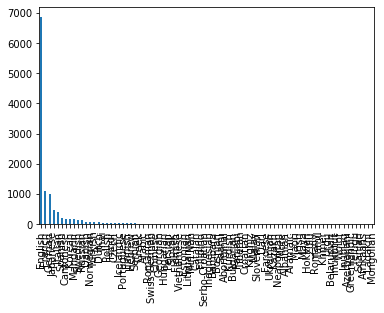

In [35]:
pd.value_counts(df['main_country']).plot.bar()


# Production Region

In [36]:
df.production_region.unique()
#print(df.production_region.unique())

array(['French', 'English', 'Swedish', ..., 'Chinese, English',
       'Spanish, English, Icelandic, Portuguese',
       'Hebrew, English, Persian'], dtype=object)

In [37]:
from collections import Counter
region_combination_frequs = Counter(df.production_region)
region_combination_frequs.most_common(20)

[('English', 5082),
 ('French', 799),
 ('German', 780),
 ('Japanese', 398),
 ('Italian', 306),
 ('English, Spanish', 252),
 ('English, French', 207),
 ('Spanish', 154),
 ('Korean', 119),
 ('English, German', 98),
 ('Mandarin', 95),
 ('Russian', 91),
 ('Swedish', 87),
 ('French, English', 82),
 ('English, Italian', 79),
 ('Cantonese', 79),
 ('English, Russian', 75),
 ('English, Japanese', 63),
 ('Turkish', 57),
 ('Danish', 52)]

In [38]:
region = df.production_region
region.head(30)

109             French
110            English
111            English
113            English
116            English
117            English
118            English
119            English
121            Swedish
123             German
125            English
127            Swedish
128             German
129            English
131             Slovak
132             German
133    Swedish, Danish
137             French
140            Russian
142            English
145            English
146            English
148             French
150            English
153            English
154             French
155            English
156            English
157             German
158            English
Name: production_region, dtype: object

In [64]:
df['production_country'] = df.production_region
reg = df['production_country']


11557

In [52]:
production_countries = [reg]
production_countries

[109       French
 110      English
 111      English
 113      English
 116      English
           ...   
 59644    English
 59646    English
 59654    English
 59664    English
 59666    English
 Name: production_country, Length: 11557, dtype: object]

In [65]:
production_countries = []
for prod_country in df.production_region.values:
    sign_languages = prod_country.replace ('Sign Languages', 'uncategorised')
    sign_language = sign_languages.replace (' Sign Language', '')
    language = sign_language.replace(' languages', '')
    each_country = language.split(', ')
    production_countries = production_countries + each_country
print('Number of countries mentioned in the Dataset: ', len(production_countries))
print(production_countries)    



Number of countries mentioned in the Dataset:  16615
['French', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'Swedish', 'German', 'English', 'Swedish', 'German', 'English', 'Slovak', 'German', 'Swedish', 'Danish', 'French', 'Russian', 'English', 'English', 'English', 'French', 'English', 'English', 'French', 'English', 'English', 'German', 'English', 'Russian', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'French', 'French', 'Russian', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'English', 'Russian', 'English', 'English', 'English', 'French', 'English', 'English', 'English', 'Polish', 'French', 'English', 'English', 'French', 'English', 'Engl

In [50]:
df['production_country'] = production_countries

ValueError: Length of values does not match length of index

In [116]:
#df['production_country'] = production_country
df.head(30)

,filename,text,IMDB_ID,genre,year,production_region,corpus,duration,directors,writers,...,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes,main_country,production_country
109,3653850.xml,[ Subtitles by Subturtles ] Du sollst nach Hau...,tt1175,"Drama,Romance",1912.0,French,untokenisiert,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,French,French
110,6581015.xml,HINTER DER LEIWAND Die Anwendung für die Arbei...,tt6414,"Comedy,Romance,Short",1916.0,English,untokenisiert,30,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English,English
111,6564964.xml,DER GRAF Maße : Hals 30 cm - Ohr - 4 cm Mounth...,tt6548,"Comedy,Short",1916.0,English,untokenisiert,24,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English,English
113,6412883.xml,"Chaplin bei der Feuerwehr "" Lass doch das Haus...",tt6684,"Comedy,Short",1916.0,English,untokenisiert,24,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English,English
116,6565009.xml,Der Abenteurer Der Mann Jagd . Ein morgendlich...,tt7613,"Comedy,Short",1917.0,English,untokenisiert,24,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English,English
117,6564950.xml,Die Heilquelle Die Gesundheit Frühling La moll...,tt7832,"Comedy,Short",1917.0,English,untokenisiert,24,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English,English
118,6567401.xml,EASY STREET Ein neuer Anfang . Easy Street Die...,tt7880,"Comedy,Short",1917.0,English,untokenisiert,24,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English,English
119,6411675.xml,DER EINWANDERER Eine Witwe und ihre Tocher Abe...,tt8133,"Comedy,Drama,Romance",1917.0,English,untokenisiert,30,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English,English
121,5578145.xml,Selma Lagerlöf : Herrn Arnes Schatz . Eine Win...,tt10247,"Drama,History",1919.0,Swedish,untokenisiert,122,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Swedish,Swedish
123,4514303.xml,GENUINE GENUINE Die Geschichte eines Vampirs W...,tt11221,Horror,1920.0,German,untokenisiert,88,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,German,German


In [ ]:
df.production_country

# Each country mentioned once

In [38]:
a = []
for y in production_country:
    if y not in a:
        a.append(y)
print(len(a))
print(a)


167
['French', 'English', 'Swedish', 'German', 'Slovak', 'Danish', 'Russian', 'Polish', 'Spanish', 'Arabic', 'Italian', 'Hungarian', 'Latin', 'Portuguese', 'Cantonese', 'Polynesian', 'Czech', 'Mandarin', 'Hebrew', 'Esperanto', 'Welsh', 'Serbian', 'Indonesian', 'Greek', 'Croatian', 'Nahuatl', 'Swahili', 'Japanese', 'Hindi', 'Swiss German', 'Athapascan', 'Romanian', 'Georgian', 'Navajo', 'Thai', 'American', 'Chinese', 'Dutch', 'Turkish', 'Arapaho', 'Romany', 'Bulgarian', 'Zulu', 'Ukrainian', 'Norwegian', 'Malay', 'Tatar', 'Urdu', 'Mongolian', 'Vietnamese', 'Estonian', 'Korean', 'Sioux', 'Neapolitan', 'Yiddish', 'Serbo-Croatian', 'Apache', 'Burmese', 'Creoles and pidgins', ' Ancient (to 1453)', 'Irish', 'Sicilian', 'Icelandic', 'Brazilian', 'Aboriginal', 'Armenian', 'Lithuanian', 'Maltese', 'Khmer', 'Klingon', 'Nepali', 'Filipino', 'Kurdish', 'Finnish', 'Sinhalese', 'Persian', 'Belarusian', 'Guarani', 'Dari', 'Pushto', 'Saami', 'Scanian', 'Bambara', 'Fulah', 'Azerbaijani', 'Hakka', 'Afrik

In [26]:
from collections import Counter
g = Counter(production_country)
g

Counter({'French': 409,
         'English': 889,
         'Swedish': 75,
         'German': 363,
         'Slovak': 12,
         'Danish': 64,
         'Russian': 183,
         'Polish': 51,
         'Spanish': 229,
         'Arabic': 99,
         'Italian': 196,
         'Hungarian': 33,
         'Latin': 70,
         'Portuguese': 50,
         'Cantonese': 94,
         'Polynesian': 1,
         'Czech': 28,
         'Mandarin': 118,
         'Hebrew': 53,
         'Esperanto': 3,
         'Welsh': 3,
         'Serbian': 25,
         'Indonesian': 11,
         'Greek': 44,
         'Croatian': 7,
         'Nahuatl': 1,
         'Swahili': 12,
         'Japanese': 136,
         'Hindi': 34,
         'Swiss German': 16,
         'Athapascan': 1,
         'Romanian': 20,
         'Georgian': 13,
         'Navajo': 2,
         'Thai': 32,
         'American': 5,
         'Chinese': 26,
         'Dutch': 37,
         'Turkish': 39,
         'Arapaho': 1,
         'Romany': 3,
         'Bul

In [10]:
countries = a
new_countries = []
for country in countries:
    new_country = country.replace(' Sign Language', '')
    new_countries.append(new_country)
print('number of countries with sign languages: ', len(countries))
print(countries)


print('number of countries without sign languages: ', len(new_countries))
print(new_countries)

number of countries with sign languages:  172
['French', 'English', 'Swedish', 'German', 'Slovak', 'Danish', 'Russian', 'Polish', 'Spanish', 'Arabic', 'Italian', 'Hungarian', 'Latin', 'Portuguese', 'Cantonese', 'Polynesian', 'Czech', 'Mandarin', 'Hebrew', 'Esperanto', 'Welsh', 'Serbian', 'Indonesian', 'Greek', 'Croatian', 'Nahuatl', 'Swahili', 'Japanese', 'Hindi', 'Swiss German', 'Athapascan languages', 'Romanian', 'Georgian', 'Navajo', 'Thai', 'American Sign Language', 'Chinese', 'Dutch', 'Turkish', 'Arapaho', 'Romany', 'Bulgarian', 'Zulu', 'Ukrainian', 'Norwegian', 'Malay', 'Tatar', 'Urdu', 'Mongolian', 'Vietnamese', 'Estonian', 'French Sign Language', 'Korean', 'Sioux', 'Neapolitan', 'Yiddish', 'Serbo-Croatian', 'Apache languages', 'Burmese', 'Creoles and pidgins', ' Ancient (to 1453)', 'Irish', 'Sicilian', 'Icelandic', 'Brazilian Sign Language', 'Aboriginal', 'Armenian', 'Lithuanian', 'Maltese', 'Khmer', 'Klingon', 'Nepali', 'Filipino', 'Kurdish', 'Finnish', 'Sinhalese', 'Persian',

In [11]:
print(new_countries)

['French', 'English', 'Swedish', 'German', 'Slovak', 'Danish', 'Russian', 'Polish', 'Spanish', 'Arabic', 'Italian', 'Hungarian', 'Latin', 'Portuguese', 'Cantonese', 'Polynesian', 'Czech', 'Mandarin', 'Hebrew', 'Esperanto', 'Welsh', 'Serbian', 'Indonesian', 'Greek', 'Croatian', 'Nahuatl', 'Swahili', 'Japanese', 'Hindi', 'Swiss German', 'Athapascan languages', 'Romanian', 'Georgian', 'Navajo', 'Thai', 'American', 'Chinese', 'Dutch', 'Turkish', 'Arapaho', 'Romany', 'Bulgarian', 'Zulu', 'Ukrainian', 'Norwegian', 'Malay', 'Tatar', 'Urdu', 'Mongolian', 'Vietnamese', 'Estonian', 'French', 'Korean', 'Sioux', 'Neapolitan', 'Yiddish', 'Serbo-Croatian', 'Apache languages', 'Burmese', 'Creoles and pidgins', ' Ancient (to 1453)', 'Irish', 'Sicilian', 'Icelandic', 'Brazilian', 'Aboriginal', 'Armenian', 'Lithuanian', 'Maltese', 'Khmer', 'Klingon', 'Nepali', 'Filipino', 'Kurdish', 'Finnish', 'Sinhalese', 'Persian', 'Belarusian', 'Guarani', 'Dari', 'Pushto', 'Saami', 'Scanian', 'Bambara', 'Fulah', 'Aze

In [12]:
filtered_country = []
for y in new_countries:
    if y not in filtered_country:
        filtered_country.append(y)
print('number of countries without sign languages(filtered): ', len(filtered_country))
print(filtered_country)

number of countries without sign languages(filtered):  167
['French', 'English', 'Swedish', 'German', 'Slovak', 'Danish', 'Russian', 'Polish', 'Spanish', 'Arabic', 'Italian', 'Hungarian', 'Latin', 'Portuguese', 'Cantonese', 'Polynesian', 'Czech', 'Mandarin', 'Hebrew', 'Esperanto', 'Welsh', 'Serbian', 'Indonesian', 'Greek', 'Croatian', 'Nahuatl', 'Swahili', 'Japanese', 'Hindi', 'Swiss German', 'Athapascan languages', 'Romanian', 'Georgian', 'Navajo', 'Thai', 'American', 'Chinese', 'Dutch', 'Turkish', 'Arapaho', 'Romany', 'Bulgarian', 'Zulu', 'Ukrainian', 'Norwegian', 'Malay', 'Tatar', 'Urdu', 'Mongolian', 'Vietnamese', 'Estonian', 'Korean', 'Sioux', 'Neapolitan', 'Yiddish', 'Serbo-Croatian', 'Apache languages', 'Burmese', 'Creoles and pidgins', ' Ancient (to 1453)', 'Irish', 'Sicilian', 'Icelandic', 'Brazilian', 'Aboriginal', 'Armenian', 'Lithuanian', 'Maltese', 'Khmer', 'Klingon', 'Nepali', 'Filipino', 'Kurdish', 'Finnish', 'Sinhalese', 'Persian', 'Belarusian', 'Guarani', 'Dari', 'Push

In [13]:
type(filtered_country)

list

# Clustering über Regionen mit Embeddings


In [14]:
from pathlib import Path
import numpy as np
def read_embeddings(embedding_file: str):
    data = Path(embedding_file).read_text()
    lines = data.split('\n')
    filenames = []
    embeddings = []
    for line in lines:
        line_data = line.split(' ')
        if len(line_data) >=2 :
            filenames.append(line_data[0])
            embeddings.append(list(map(float, line_data[1:])))
    return np.asarray(filenames), np.asarray(embeddings)

In [15]:
filenames, embeddings = read_embeddings('../dataset/embeddings_mean.txt')

In [16]:
filenames.shape, embeddings.shape

((34473,), (34473, 300))

In [17]:
df = df[df['filename'].isin(filenames)].copy()
df.shape

(11547, 19)

# Split Region

In [18]:
North_AmericaValue = 'English'
EuropeValue = 'France'
North_America = df.production_region = North_AmericaValue
Europe = df.production_region = EuropeValue
production_regions = North_AmericaValue + EuropeValue
colorlist = []

for x in df.production_region:
    if x =='English':
        colorlist.append('red')
    elif x =='French':
        colorlist.append('blue')
    else: 
        colorlist.append('white')

In [19]:
df['labelcolor']=colorlist

In [20]:
pd.value_counts(dfs.colors).plot.bar() 
pd.value_counts(dfs.colors)

AttributeError: 'DataFrame' object has no attribute 'colors'

# K-Means

In [ ]:
model = KMeans(n_clusters=2)
model.fit(embeddings)

In [ ]:
len(model.labels_)

# Split without Embedding


In [ ]:
colors = []
for x in df.production_region:
    if x =='English':
        colors.append('red')
    elif x =='French':
        colors.append('blue')
    else: 
        colors.append('white')
dfs['colors']=colors

pd.value_counts(dfs.colors).plot.bar() 
pd.value_counts(dfs.colors)
